# ***Preprocessing Data***

In [1]:
import pandas as pd 
import string
from sklearn.feature_extraction.text import TfidfVectorizer

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
from collections import Counter
import spacy
import re

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS



**Loading File**

In [3]:
ds = pd.read_csv("C:\\Users\\ujjwa_n18433z\\Desktop\\ujjwal\\All Projects\\Project_WoC_7.0_Fake_Review_Detection\\fakeReviewData.csv")

## Preprocessing Data

In [5]:
ds["text_"] = ds["text_"].str.replace(r'\d+', "", regex=True).str.lower()
ds["text_"] = ds["text_"].str.translate(str.maketrans('', '', string.punctuation)).str.strip().str.replace(r'\s+',' ', regex=True)

In [6]:
ds["text_"] = ds["text_"].str.replace(r'\d+', "", regex=True).str.lower()
ds["text_"] = ds["text_"].str.translate(str.maketrans('', '', string.punctuation)).str.strip().str.replace(r'\s+',' ', regex=True)

In [7]:
lemmatizer = WordNetLemmatizer()
ds["text_"] = ds["text_"].apply(lambda x : "".join(lemmatizer.lemmatize(word) for word in x))


In [8]:
tfidf_vectorizer=TfidfVectorizer(max_features=500)
tfidf_vector = tfidf_vectorizer.fit_transform(ds["text_"])
dfidf_df=pd.DataFrame(tfidf_vector.toarray(),columns=tfidf_vectorizer.get_feature_names_out())
df=pd.concat([ds,dfidf_df],axis=1)

In [11]:
df.head()

,category,rating,label,text_,able,about,absolutely,acting,action,actually,...,would,writing,written,year,years,yet,you,young,your,youre
0,Home_and_Kitchen_5,5.0,CG,love this well made sturdy and very comfortabl...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,Home_and_Kitchen_5,5.0,CG,love it a great upgrade from the original ive ...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.376512,0.0,0.0,0.0,0.0,0.0
2,Home_and_Kitchen_5,5.0,CG,this pillow saved my back i love the look and ...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,Home_and_Kitchen_5,1.0,CG,missing information on how to use it but it is...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,Home_and_Kitchen_5,5.0,CG,very nice set good quality we have had the set...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


### Checking If All the Words Are in English

In [ ]:
nlp_en = spacy.load("en_core_web_sm")
def is_english_spacy(text, nlp=nlp_en, threshold=0.7):
    doc = nlp(text)
    english_tokens = [token for token in doc if token.has_vector or not token.is_oov]
    num_english_tokens = len(english_tokens)
    total_tokens = len(doc)
    if total_tokens == 0:
        return False
    percentage_english = num_english_tokens / total_tokens
    return percentage_english >= threshold

def is_english_spacy_row(row, column_name):
    text = row[column_name]
    return is_english_spacy(text)


isenglish = df.apply(is_english_spacy_row, axis=1, column_name='text_')

print(isenglish.value_counts())

True     40431
False        1
Name: count, dtype: int64


### Checking For Unicode Character

In [44]:
def has_unicode_characters(text):
    """Checks if a string contains any non-ASCII characters (Unicode)."""
    return not all(ord(char) < 128 for char in text)

def has_unicode_characters_row(row, column_name):
    """Applies has_unicode_characters to a DataFrame row."""
    text = row[column_name]
    return has_unicode_characters(text)

hasunicode = df.apply(has_unicode_characters_row, axis=1, column_name='text_')

print(hasunicode.value_counts())

False    40428
True         4
Name: count, dtype: int64


## Visualising Data Analysis

### Pie Chart for Category

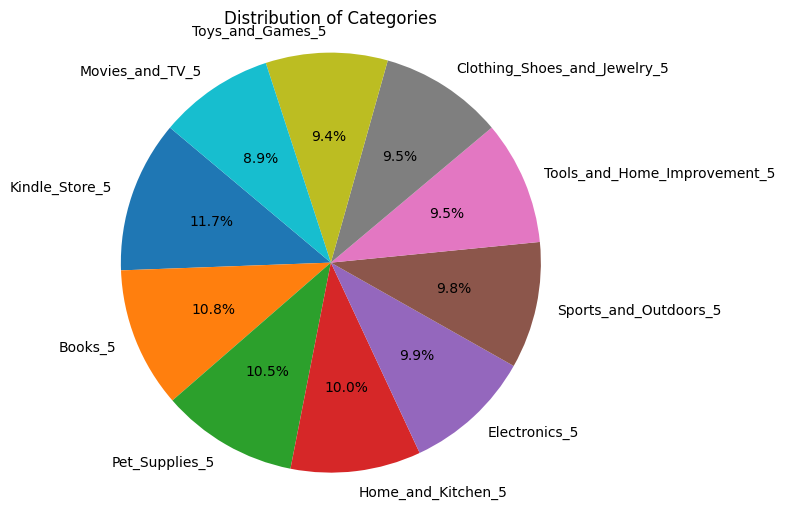

In [11]:
category_counts = df["category"].value_counts()
plt.figure(figsize=(8, 6))  
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Categories')
plt.axis('equal') 
plt.show()

In the pie chart, we can see that each category is equally weighted.

###  Stack Bar Chart For Category and Label(OR,CG)

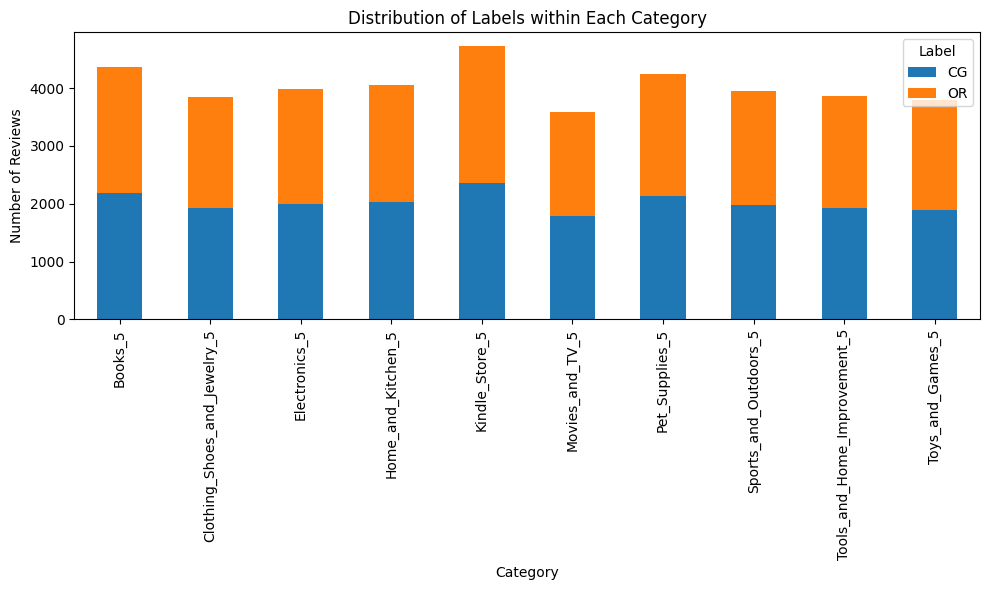

In [12]:
grouped_data = df.groupby(['category', 'label']).size().unstack(fill_value=0) 
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Labels within Each Category')
plt.xlabel('Category')
plt.ylabel('Number of Reviews')
plt.legend(title='Label', loc='upper right')  
plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()

In the stacked bar chart, the class labels are equal across all categories.

### Stack Bar Graph For Category and Rating

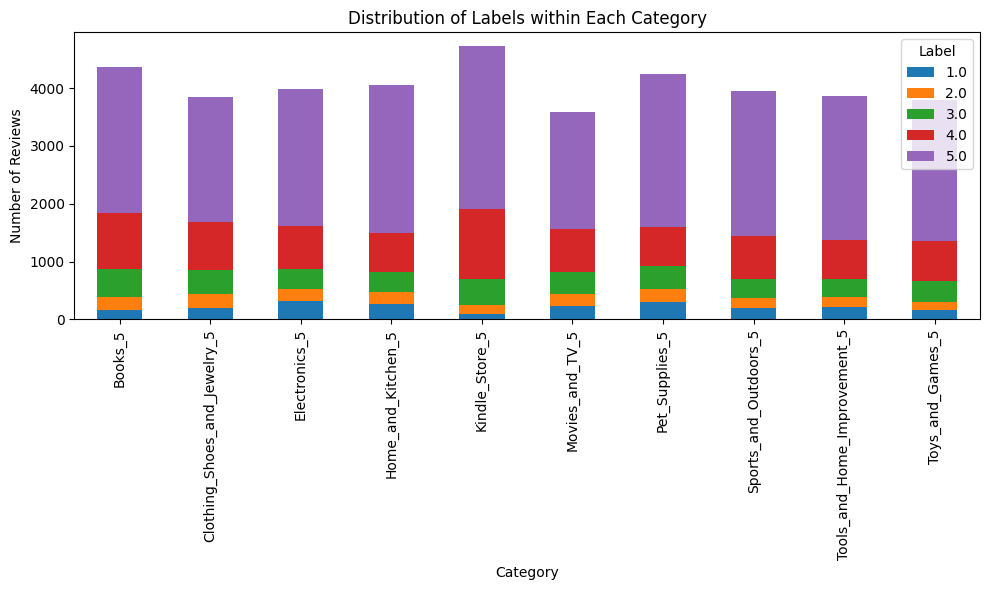

In [39]:
grouped_data = df.groupby(['category', 'rating']).size().unstack(fill_value=0) 

grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Labels within Each Category')
plt.xlabel('Category')
plt.ylabel('Number of Reviews')
plt.legend(title='Label', loc='upper right')  
plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()

In this chart, we can see that the number of 5-star ratings is the highest for each category, and it gradually decreases as the rating decreases. This means there are more instances for 5-star ratings than for 4-star ratings, followed by 3-star ratings, and so on.

### Stack Bar Chart For Label and Rating

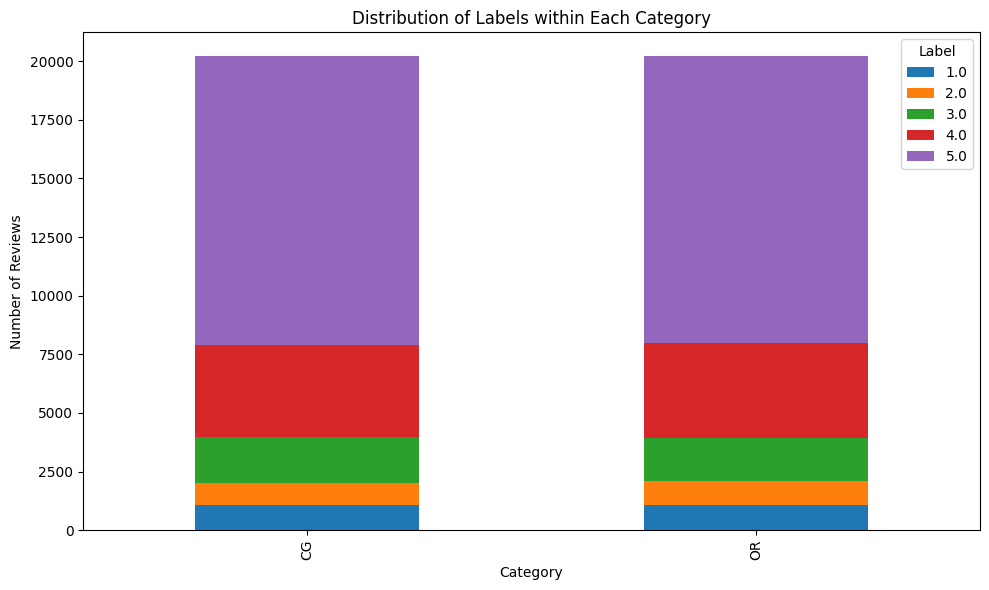

In [40]:
grouped_data = df.groupby(['label','rating']).size().unstack(fill_value=0) 

grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Labels within Each Category')
plt.xlabel('Category')
plt.ylabel('Number of Reviews')
plt.legend(title='Label', loc='upper right')  
plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()

In this chart, we can see that the number of 5-star ratings is the highest for each Label, and it gradually decreases as the rating decreases. This means there are more instances for 5-star ratings than for 4-star ratings, followed by 3-star ratings, and so on.

### Histogram of Count of word in Text 

Number of documents: 40432
Average document length: 66.88679758607044


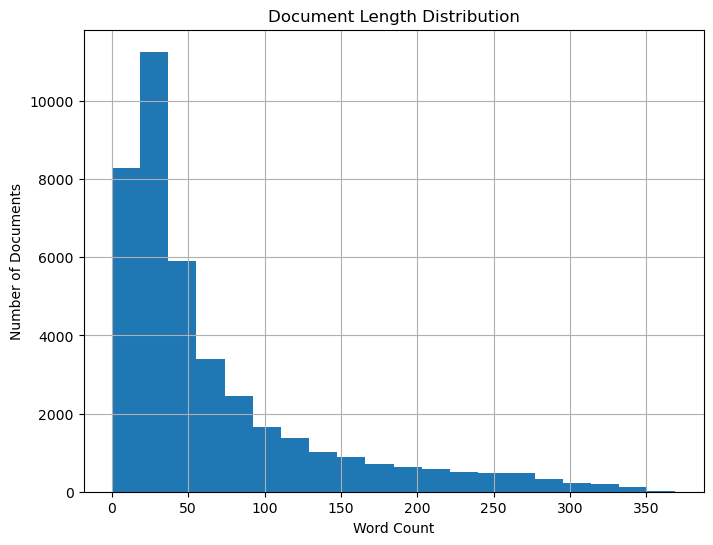

In [41]:
num_documents = len(df)
print("Number of documents:", num_documents)

df['word_count'] = df['text_'].apply(lambda x: len(word_tokenize(x)))
average_document_length = df['word_count'].mean()
print("Average document length:", average_document_length)

plt.figure(figsize=(8, 6))
df['word_count'].hist(bins=20)
plt.title('Document Length Distribution')
plt.xlabel('Word Count')
plt.ylabel('Number of Documents')
plt.show()

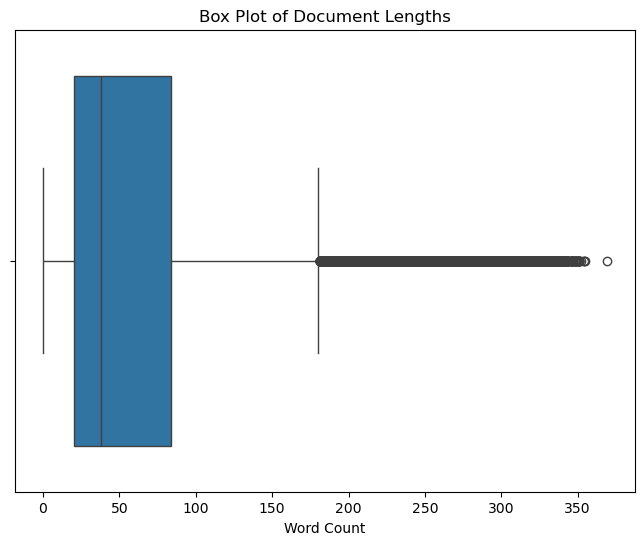

In [52]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['word_count'])
plt.title('Box Plot of Document Lengths')
plt.xlabel('Word Count')
plt.show()

Most of the time length of Text is between 0 to 170  

### Word Cloud for Original Comment

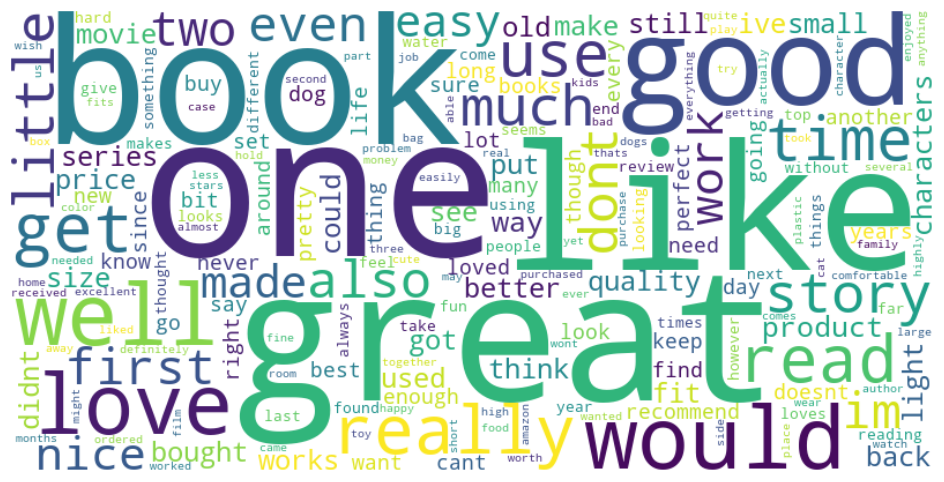

In [59]:
filter_df_OR=df[df['label']=='OR']

text = ' '.join(filter_df_OR['text_'])

tokens = word_tokenize(text)

stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if word not in stop_words]

word_counts = Counter(tokens)

wordcloud = WordCloud(width=800, height=400, background_color='white',stopwords=STOPWORDS,min_font_size=10).generate_from_frequencies(word_counts)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

From the word cloud, we can see that the most common words are "great," "book," "one," "like," "would," "love," "well," and many more.

### Word Cloud for Fake Comment

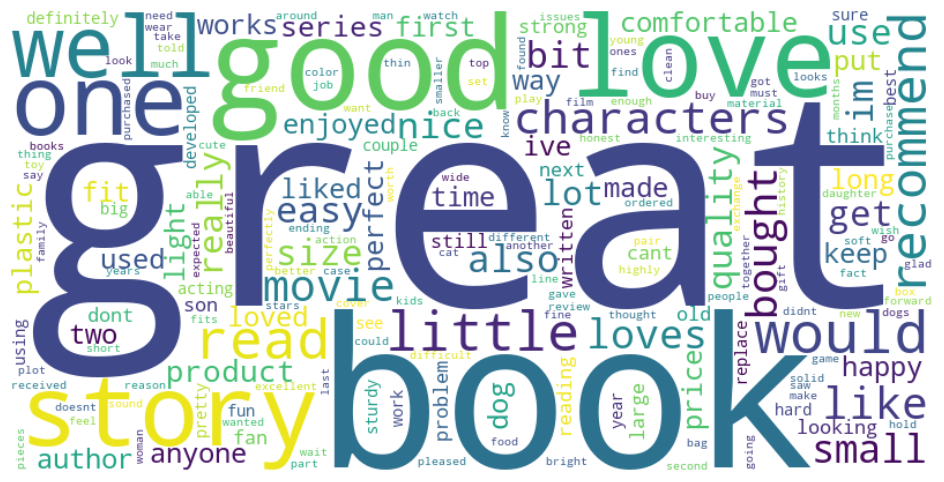

In [17]:
def clean_text(text):
        text = text.lower() 
        text = re.sub(r'\W', ' ', text) 
        text = re.sub(r'\s+', ' ', text).strip() 
        return text
df['text_clean'] = df['text_'].apply(clean_text)

filter_df_CR=df[df['label']=='CG']
text = ' '.join(filter_df_CR['text_clean']) 

tokens = word_tokenize(text)

stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if word not in stop_words]

word_counts = Counter(tokens)

wordcloud = WordCloud(width=800, height=400, background_color='white',stopwords=STOPWORDS,min_font_size=10).generate_from_frequencies(word_counts)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

From the word cloud, we can see that the most common words are "great","book","story","good", "love", "one" "well," and many more.

In both word clouds, we see that the most frequent words are the same, indicating a lack of distinctive differences in word usage across the datasets.